Before you turn this homework set in, make sure everything runs as expected. When you are done modifying this file,  **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below. In the code cells, make sure to replace the **raise NotImplementedError()** statement with your actual code.

In [1064]:
NAME = "Liyuan Sun"

---

**Disclaimer:** For this assignment, there are some things that you are asked to do that we have not explicitly done in class. 
For example, you will be asked to modify figures in Matplotlib in new ways. Please use your favorite search engine to look up how to do these things. Realistically, when you use Python in your jobs in the future you will be spending a significant portion of your time to look up new things. And it's never too early to practice that skill. 

## Problem

You can find the data files "Mouse_metadata.csv" and "Study_results.csv" which you will need for this homework on Canvas. 

In a pharmaceutical study, 249 mice identified with squamous cell carcinoma (skin cancer) tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The scientists measured the tumor growth over time (volume in $mm^3$) and the number of metastatic sites. The purpose of the study was to compare the performace of the new drug "Capomulin" to several other existing drug regimens. 

Begin by loading the two data sets into Pandas as data frames. 

In [1065]:
import pandas as pd
mouse_meta = pd.read_csv('Mouse_metadata.csv')
mouse_meta.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,s185,Capomulin,Female,3,17
1,x401,Capomulin,Female,16,15
2,m601,Capomulin,Male,22,17
3,f966,Capomulin,Male,16,17
4,u364,Capomulin,Male,18,17


In [1066]:
study_result = pd.read_csv('Study_results.csv')
study_result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


(a) Describe the two data files. How many rows and columns are in each file? What variables are in the columns? What is in the rows? What is the Pandas index currently used? Do the two files have any common columns?

**Mouse_metadata dataset**
<br> 249 rows * 5 columns
<br> There're 5 columns (variables): 'Mouse ID','Drug Regimen','Sex','Age_months','Weight(g)'.
<br> There're 249 rows (observations), each row contains one mice's recodes 'Mouse ID','Drug Regimen','Sex','Age_months','Weight(g)'.
<br> The index used here is RangeIndex(start=0, stop=249, step=1), which is the integers range from 0 to 249.

<br>**Study_results dataset**
<br> 1893 rows * 4 columns 
<br> There're 4 columns (variables): ‘Mouse ID','Timepoint','Tumor Volume(mm3)','Metastatic Sites'.
<br> There're 1893 rows (observations), each observation is the measured tumor volume (𝑚𝑚3) and the number of metastatic sites collected from a specific mice which is observed at a specific timepoint.
<br> The index used here is RangeIndex(start=0, stop=1893, step=1), which is the integers range from 0 to 1893.

<br>**Common Columns**
<br> In these two files, they both have the column 'Mouse ID'.

(b) Write Pandas code to find the number of male and female mice that were subjected to each drug regimen. You will have to merge the two data files in order to do this. Save the results as a Pandas data frame with the names of the drugs as the index and two columns (one for male, one for female). The two columns should contain the counts of individuals subjected to each drug regimen. Display your resulting data frame using a print statement. 

In [1067]:
df1 = mouse_meta.groupby(['Drug Regimen','Sex']).count() # count the number of male and female for each drug regimen 
df2 = df1.unstack(level=-1)                              # pivot last level of the index labels, which is though 'Sex'
df3 = df2['Mouse ID']                                    # get the subset from pivot table
df3

Sex,Female,Male
Drug Regimen,,
Capomulin,13,12
Ceftamin,13,12
Infubinol,12,13
Ketapril,9,16
Naftisol,13,12
Placebo,13,12
Propriva,12,13
Ramicane,9,16
Stelasyn,15,9


(c) Use Matplotlib to create a side-by-side bar plot that shows the numbers of males and females under each drug regimen. Make sure to label your plot (label the bar groups with the names of the drugs, create a legend, label the y-axis and title your plot). Use different colors for males (blue) and females (red). Look up how to rotate axis lables (to make all the drug names readable). 

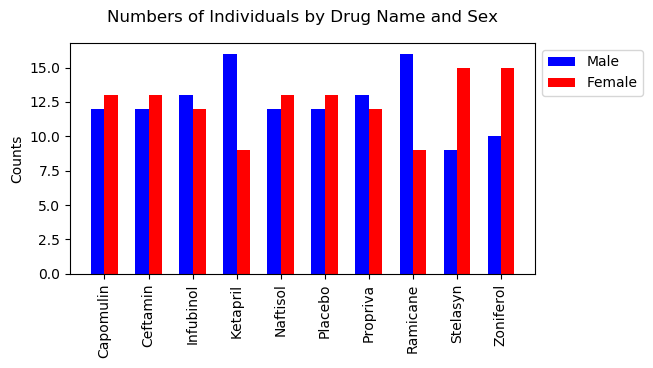

In [1068]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')               # using a different style
plt.rcParams['figure.figsize'] = [6, 3]         # sets the size of figures in this notebook

x_pos = np.arange(len(df3))                      # x-coordinates of bars

# side-by-side bar plot
plt.bar(x_pos, df3.Male, width = -0.3, label = 'Male', align = 'edge', color = 'blue')
plt.bar(x_pos, df3.Female, width = 0.3, label= 'Female', align = 'edge', color = 'red')

plt.ylabel('Counts')                             # y-coordinates
plt.title('Numbers of Individuals by Drug Name and Sex', pad = 15)

plt.xticks(x_pos, df3.index, rotation = 90)      # labels for x-axis
plt.legend(bbox_to_anchor=(1, 1));

(d) Use Pandas to find the average tumor size for each drug regiment, separately at each time-point. Store your results in a Pandas data frame with time point as the index and ten columns (one column per drug regimen). Display your resulting data frame using a print statement. 

**Hint:** Recall, that ```unstack()``` is the opposite of the ```melt()``` procedure. Read up on details in either your text or on the Python documentation website. 

In [1069]:
df_merge = pd.merge(mouse_meta, study_result, on = 'Mouse ID')
df4 = pd.pivot_table(df_merge, values='Tumor Volume (mm3)', 
                     index='Timepoint', columns = 'Drug Regimen',aggfunc=np.mean)   # unstack one variable
df4

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


(e) Use Matplotlib to create a line-graph of the average tumor size as a function of time for each drug regimen. Include all ten drugs in the same plot and use differnt colors for different drugs. Make sure to label your plot (include x- and y-axis labels, title, legend for which curve belongs to which drug). Please place the legend outside the plot (you should look up how to do this).

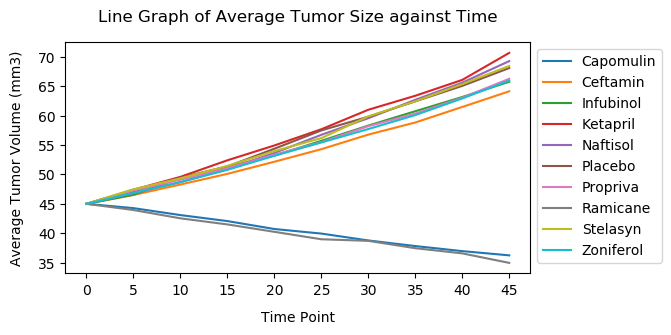

In [1070]:
for i in df4.columns:
    plt.plot(df4[i], label = i);

plt.xlabel('Time Point',labelpad = 10)        
plt.ylabel('Average Tumor Volume (mm3)',labelpad = 10)
plt.xticks(np.arange(0,50,5))

plt.title('Line Graph of Average Tumor Size against Time', pad = 15)    
plt.legend(loc ='upper left', bbox_to_anchor=(1, 1)); 

(f) Use Pandas to create a Data Frame that has one row per mouse, index values should be Mouse IDs, and has exatly the following columns: "Weight" (initial mouse weight in grams), "Sex", "Age" (of mouse at the beginning of trial in months), "Tumor" (final tumor size at the end of the trial), "Drug Regimen". Display your resulting data frame using a print statement. 

In [1071]:
df5 = df_merge[df_merge.Timepoint == 45].drop(columns = ['Timepoint','Metastatic Sites'])
df5.set_index('Mouse ID', inplace = True)
df5

,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
Mouse ID,,,,,
s185,Capomulin,Female,3,17,23.343598
x401,Capomulin,Female,16,15,28.484033
m601,Capomulin,Male,22,17,28.430964
u364,Capomulin,Male,18,17,31.023923
y793,Capomulin,Male,17,17,31.896238
...,...,...,...,...,...
p136,Zoniferol,Female,5,28,63.488697
q511,Zoniferol,Female,2,28,68.611061
q633,Zoniferol,Male,12,25,70.827796


(g) Use Matplotlib to create a scatterplot of final tumor size against initial mouse weight. Use different colors for different drug treatments. Make sure to label your plot (include x- and y-axis labels, title, and a legend for which color belongs to which drug). 

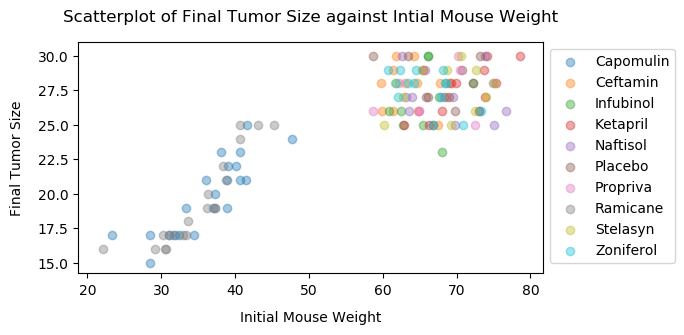

In [1072]:
# each drug name with one spefic label
for key in df5.groupby('Drug Regimen').groups:
    subgroup = df5[df5['Drug Regimen'] == key]
    plt.scatter(subgroup['Tumor Volume (mm3)'], subgroup['Weight (g)'], alpha = 0.4, label = key)

plt.xlabel('Initial Mouse Weight',labelpad = 10)
plt.ylabel('Final Tumor Size',labelpad = 10)
plt.title("Scatterplot of Final Tumor Size against Intial Mouse Weight", pad = 15)
plt.legend(loc ='upper left', bbox_to_anchor=(1, 1)); 

(h) Comment on what you see in the plot you just created. Do the mice seem to have been randomly assigned to the treatments? 

**Decribe Graph:** 
<br>From the scatteplot, the data could be seperated into two clusterings. One clustering is on bottom left, which colored with gray and blue. The other clustering is on top right, which colored with the rest colors.

**Conclude:**
<br>In this example, different drug treatments are categorized with different colors. To be specific, we can conclude that Mice treated with **'Capomulin' (Blue)** and **'Ramicane' (Gray)** tend to have **lighter intial weight**, compared to the mice with other drug treatments. 

Therefore, the mice are not randomly assigned to the treatments. 

(i) Create a side-by-side boxplot for initial mouse weight across drug regimens. Order the drugs, so that the boxplots for the drugs "Capomulin" and "Ramicane" appear on the left. 

**Note:** Look at the matplotlib gallery to understand how to create a side-by-side boxplot. 

**Hint:** start with a list of lists of values you want to plot. 

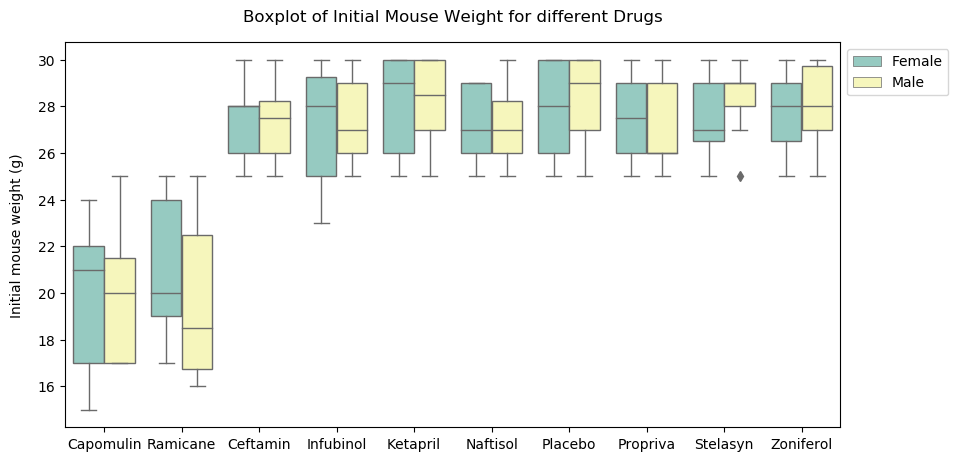

In [1077]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]         # sets the size of figures in this notebook
drug_regimen = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"]

sns.boxplot(x = 'Drug Regimen', y = 'Weight (g)', hue = 'Sex', data = mouse_meta, linewidth = 1, order = drug_regimen, palette="Set3")

plt.xlabel("", labelpad = 10)
plt.ylabel("Initial mouse weight (g)", labelpad = 10)

plt.title("Boxplot of Initial Mouse Weight for different Drugs", pad = 15)
plt.legend(loc ='upper left', bbox_to_anchor=(1, 1));
